In [176]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import random as rand

In [177]:
edges = pd.read_csv('custom_edges.csv')[['member1', 'member2']]
attributes = pd.read_csv('Nashville meetup data\meta-members.csv')
member_to_group = pd.read_csv('Nashville meetup data\member-to-group-edges.csv')
edges.shape
#edges = edges.sample(int(round(edges.shape[0]*0.1,0)))

(1026330, 2)

In [178]:
group_attributes = pd.read_csv('Nashville meetup data\meta-groups.csv')

considered = group_attributes['category_name'].value_counts().index[-10:].tolist()
group_attributes = group_attributes[group_attributes['category_name'].apply(lambda x: x in considered)]

In [179]:
member_group_category = pd.merge(member_to_group, group_attributes[['group_id', 'category_name']], how = 'left', left_on = 'group_id', right_on = 'group_id')

In [180]:
member_group_category_oh = member_group_category.drop('category_name', axis=1).join(pd.get_dummies(member_group_category['category_name']))

In [181]:
final_attributes = pd.merge(attributes, member_group_category_oh.groupby('member_id').agg('max'), how='left', right_on='member_id', left_on='member_id')

In [182]:
final_attributes[considered] = final_attributes[considered].fillna(False)
final_attributes

,member_id,name,hometown,city,state,lat,lon,group_id,weight,Cars & Motorcycles,Dancing,Fashion & Beauty,Hobbies & Crafts,Movies & Film,Pets & Animals,Photography,Sci-Fi & Fantasy,Singles,Writing
0,2069,Wesley Duffee-Braun,Brentwood,Brentwood,TN,36.00,-86.79,19277993,4,False,False,False,False,False,False,False,False,False,False
1,8386,Tim,Nashville,Nashville,TN,36.07,-86.78,19654655,8,False,False,False,False,True,False,False,False,False,False
2,9205,Brenda,Brentwood,Brentwood,TN,36.00,-86.79,20181560,20,False,False,False,False,False,True,False,False,False,False
3,17903,Steve,NaN,Nashville,TN,36.13,-86.80,7130232,1,False,False,False,False,False,False,False,False,False,False
4,20418,Andrea Reynolds,"Huntington, WV",Nashville,TN,36.17,-86.72,19728145,1,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24586,239513469,Madison Ray,NaN,Nashville,TN,36.09,-86.82,19997487,1,False,False,False,False,False,False,False,False,False,False
24587,239515413,Jay Hatchett,NaN,La Vergne,TN,36.00,-86.57,19822479,1,False,False,False,False,False,False,False,False,False,False
24588,239519977,Lukasz Bielawski,NaN,Nashville,TN,36.17,-86.78,6335372,1,False,False,False,False,False,False,False,False,False,False
24589,239520184,Terri Taylor,NaN,Nashville,TN,36.14,-86.74,1585196,1,False,False,False,False,False,False,False,False,False,False


In [183]:
attributes = attributes[final_attributes[considered].T.agg('max')]
memberlist = attributes['member_id'].sample(2000).tolist()

In [184]:
edges = edges[edges[['member1', 'member2']].isin(memberlist).T.agg('min')]

In [185]:
import networkx as nx
import tqdm

In [186]:
G = nx.Graph()

In [187]:
for index, entry in tqdm.tqdm(edges.iterrows()):
    x, y = entry['member1'], entry['member2']
    G.add_edge(x,y)

30576it [00:01, 21764.72it/s]


In [188]:
len(memberlist)

2000

In [189]:
final_attributes

,member_id,name,hometown,city,state,lat,lon,group_id,weight,Cars & Motorcycles,Dancing,Fashion & Beauty,Hobbies & Crafts,Movies & Film,Pets & Animals,Photography,Sci-Fi & Fantasy,Singles,Writing
0,2069,Wesley Duffee-Braun,Brentwood,Brentwood,TN,36.00,-86.79,19277993,4,False,False,False,False,False,False,False,False,False,False
1,8386,Tim,Nashville,Nashville,TN,36.07,-86.78,19654655,8,False,False,False,False,True,False,False,False,False,False
2,9205,Brenda,Brentwood,Brentwood,TN,36.00,-86.79,20181560,20,False,False,False,False,False,True,False,False,False,False
3,17903,Steve,NaN,Nashville,TN,36.13,-86.80,7130232,1,False,False,False,False,False,False,False,False,False,False
4,20418,Andrea Reynolds,"Huntington, WV",Nashville,TN,36.17,-86.72,19728145,1,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24586,239513469,Madison Ray,NaN,Nashville,TN,36.09,-86.82,19997487,1,False,False,False,False,False,False,False,False,False,False
24587,239515413,Jay Hatchett,NaN,La Vergne,TN,36.00,-86.57,19822479,1,False,False,False,False,False,False,False,False,False,False
24588,239519977,Lukasz Bielawski,NaN,Nashville,TN,36.17,-86.78,6335372,1,False,False,False,False,False,False,False,False,False,False
24589,239520184,Terri Taylor,NaN,Nashville,TN,36.14,-86.74,1585196,1,False,False,False,False,False,False,False,False,False,False


In [190]:
import pickle

pickle.dump(G, open('graph.pickle', 'wb'))

In [191]:
def prototype():
    prot = rand.choice([n for n in G])
    subgraph = nx.descendants(G, prot)
    subgraph.add(prot)

    return prot, G.subgraph(subgraph)

In [196]:
p, s = prototype()
distances = nx.resistance_distance(s, p)


1669

In [199]:
G.number_of_nodes()

1673

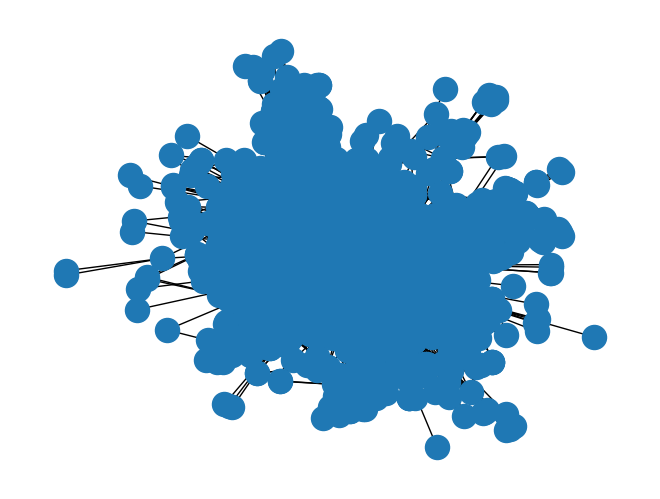

In [174]:
p, s = prototype()

nx.draw(s)

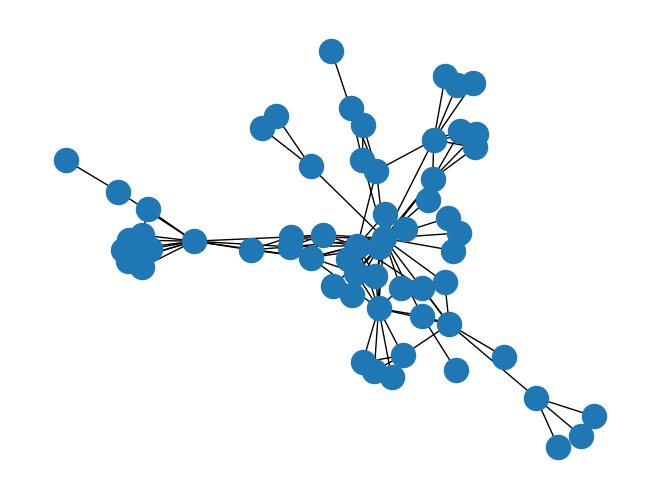

In [64]:
len(paths)

1976